In [12]:
"https://www.kaggle.com/code/mbalvi75/08-knn-diabetes-dataset"
import os
import sys
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

root = os.path.dirname(os.path.abspath("."))
sys.path.append(root)

# pycharm
#from ..predikit.visualization.visualization import Visualization
#vscode
from predikit.visualization import Visualization

In [13]:
diabetes_data = pd.read_csv('./sample_data/diabetes.csv')
print(diabetes_data.head(3))

diabetes_data.info(verbose=True)

diabetes_data_copy = diabetes_data.copy(deep=True)
diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data_copy[
    ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace=True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace=True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace=True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace=True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace=True)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null   

[]

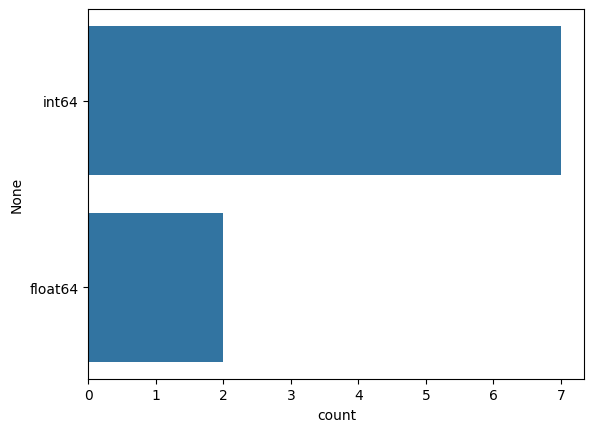

In [30]:
# Countplot
count_plot = Visualization(
    params={"data": diabetes_data, 'y': diabetes_data.dtypes,
            }, strategy="countplot")

count_plot.plot()

2024-03-21 09:52:51,909 (colorbar.py:859) - DEBUG: locator: <matplotlib.ticker.AutoLocator object at 0x000001F998DEC7D0>


[]

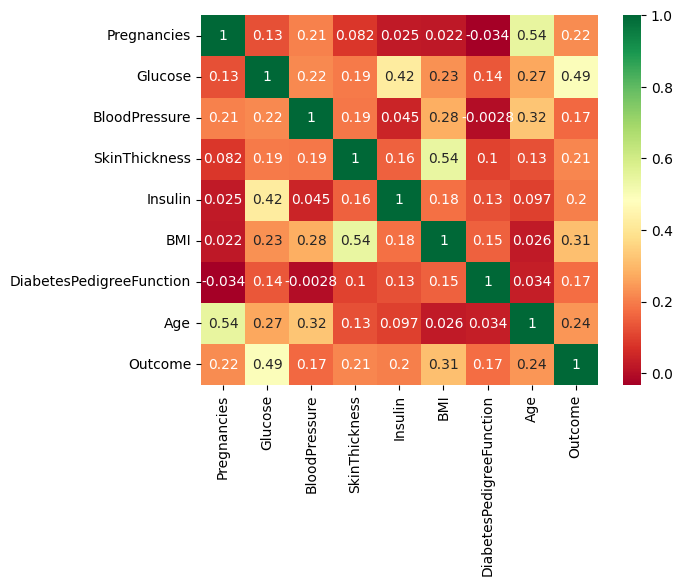

In [29]:
# Heatmap
hm = Visualization(
    params={"data": diabetes_data_copy.corr(), "annot": True, "cmap": "RdYlGn"
            }, strategy="heatmap")
hm.plot()

In [ ]:
# Histogram
#p=diabetes_data.Outcome.value_counts().plot(kind="bar")
print("Outcome\n",diabetes_data["Outcome"].values,"\n")
print("Outcome counts\n",diabetes_data["Outcome"].value_counts())
bar = Visualization(params={"data":diabetes_data,
                            "x":diabetes_data["Outcome"].values,
                            "height": len(diabetes_data["Outcome"]),}
                    , strategy="barplot")
bar.plot()